## Multiple Linear Regression

Now you know how to build a model with one X (independent variable) and Y (dependent variable). But what if you have three feature variables, or may be 10 or 100? By using multiple linear regression, you can build models between a dependent variable and many independent variables.

Dataset - advertising.csv

Independent variables - TV Ad Expenses, Radio Ad Expenses, Newspaper Ad Expenses

Dependent variable - Sales

In [2]:
#1 Import necessery libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#2 Import the dataset (advertising.csv) and look at the top five rows
dataset=pd.read_csv('advertising.csv')

In [12]:
#3 Look at the bottom five rows
dataset.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [13]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
#4 Check the shape of the DataFrame (rows, columns)
dataset.shape

(200, 4)

In [15]:
dataset.drop(dataset[dataset['TV']==38.2] ,axis=0)

KeyError: "['TV' 'Radio' 'Newspaper' 'Sales'] not found in axis"

In [6]:
#5 Look at the data types of the columns
dataset.columns
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
#6 Look at the summary statistics
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


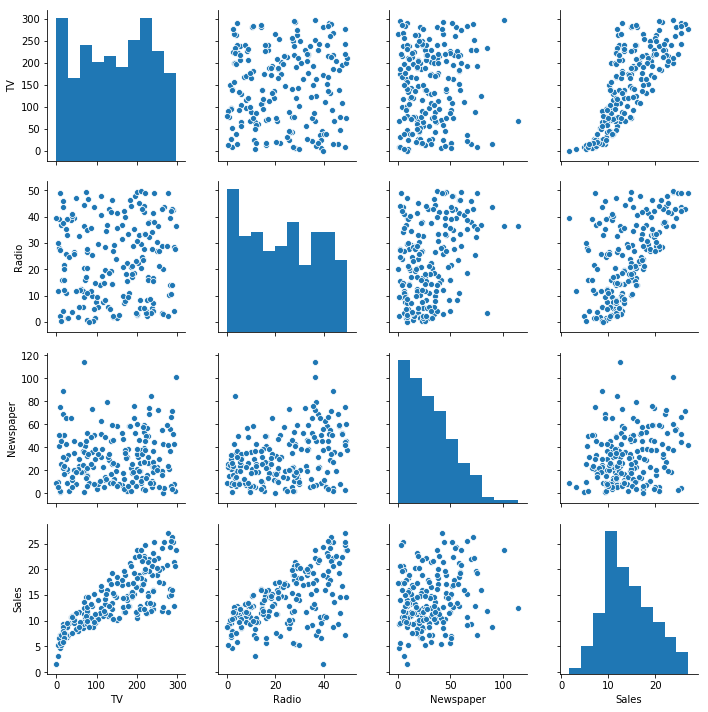

In [4]:
#7 Do a pairplot of the variables
import seaborn as sns
sns.pairplot(dataset)



In [9]:
#8 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
radio=dataset['Radio']
tv=dataset['TV']
news=dataset['Newspaper']
sale=dataset['Sales']

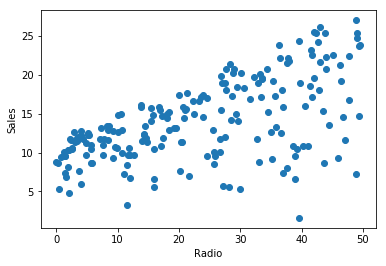

In [10]:
plt.scatter(radio,sale)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

/home/akhilesh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/akhilesh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/home/akhilesh/anaconda3/lib/python3.7/site-pa

TypeError: map() missing 1 required positional argument: 'func'

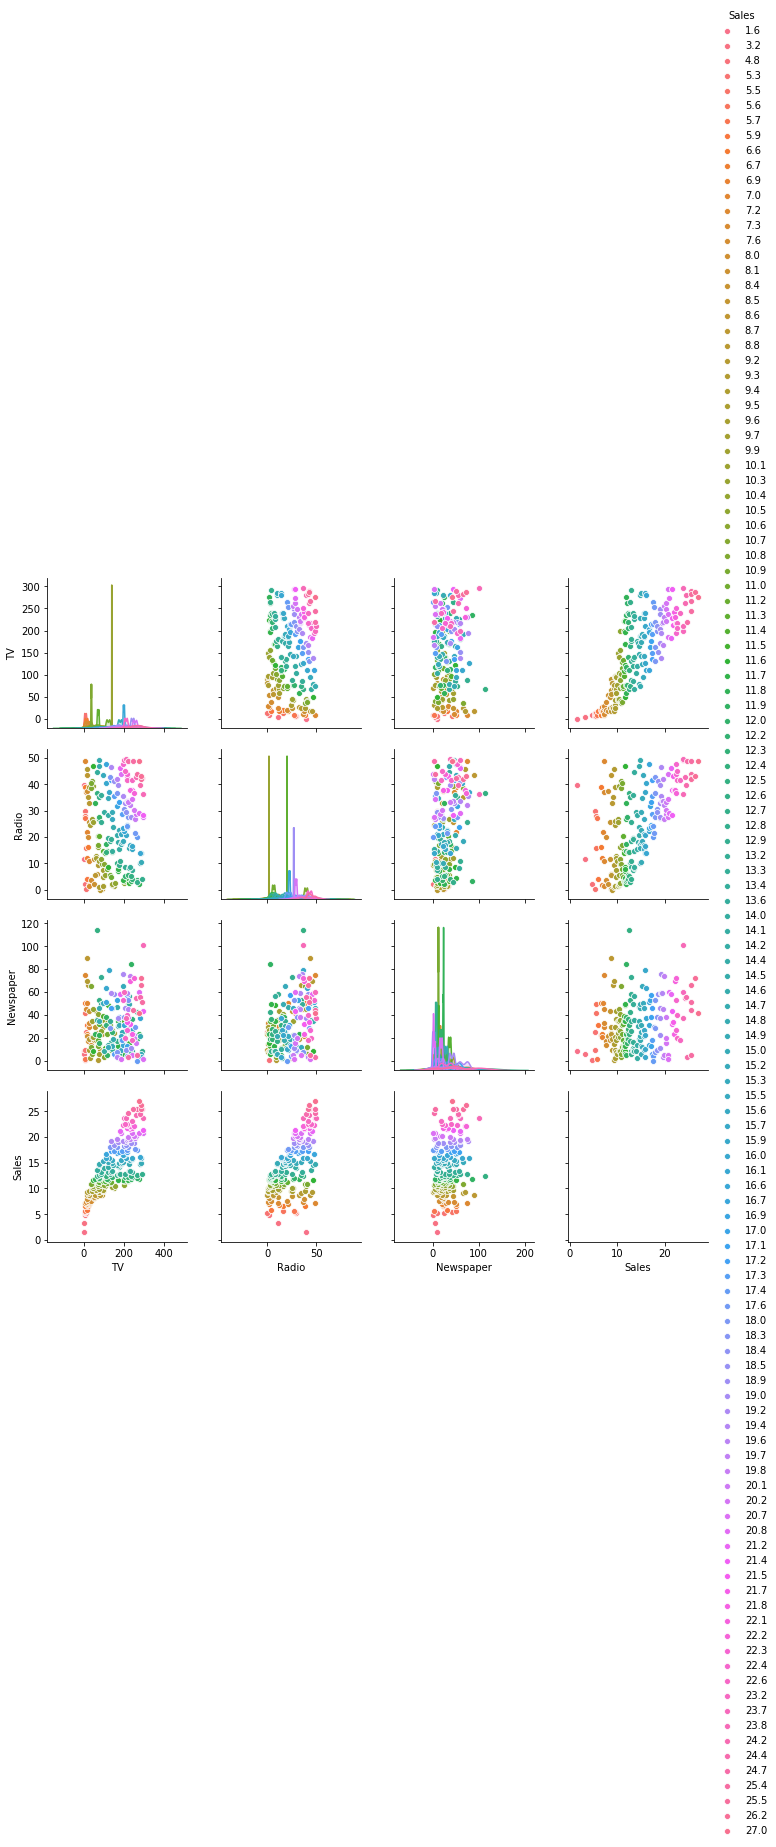

In [6]:
sns.pairplot(data=dataset,hue="Sales").map(plt=plt.scatter)

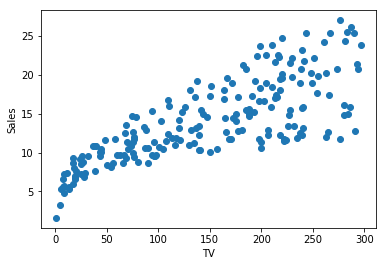

In [11]:
plt.scatter(tv,sale)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

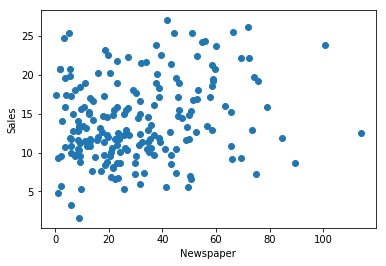

In [12]:
plt.scatter(news,sale)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [7]:
#9 Prepare  X (independent variables) and y (dependent variable)
X=dataset.iloc[0:,:-1].values
Y=dataset.iloc[:,-1:].values

In [8]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [9]:
#11 Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regres=regressor.fit(X_train,Y_train)
regres

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<function matplotlib.pyplot.show(*args, **kw)>

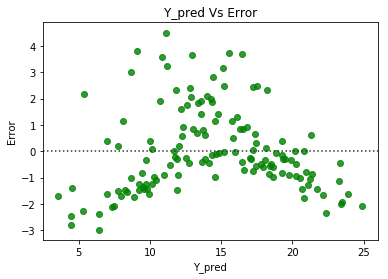

In [10]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Residual plot - plot y_pred in x axis and errors in y axis
y_pred=regressor.predict(X_train)
y_tr=np.array(Y_train)

errors=y_pred-y_tr
#print(errors)
sns.residplot(y_pred,errors,color="green")
plt.xlabel('Y_pred')
plt.ylabel('Error')
plt.title('Y_pred Vs Error')
plt.show

In [13]:
#13 Predic on the test set 
result=regressor.predict(X_test)
#print(result)

In [17]:
#14 Print Mean Squared Error and R Squared Value
from sklearn.metrics import  mean_squared_error ,r2_score

rm=mean_squared_error(Y_test,result)
print(rm)


3.691394845698608


In [18]:
rscore = r2_score(result,Y_test)
rscore

0.8454397519692016

## Backward elimination

In [61]:
X.shape

(200, 4)

#####  Build the optimal model using backward elimination


In [16]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((200,1)).astype(int),values=X,axis=1)
x_opt=X[:,[0,1,2,3,4]]
#regressor_OLs=sm.OLS(endog=Y ,exog=x_opt).fit()
#regressor_OLS.summary()
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()

print(regressor_OLS.summary())
X.shape

NameError: name 'X' is not defined

## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [65]:
#16Import the dataset (Housing.csv) and look at the top five rows
hm=pd.read_csv('Housing.csv')

In [66]:
#17 Look at the bottom five rows
hm.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [67]:
#18 Check the shape of the DataFrame (rows, columns)
hm.shape

(545, 13)

In [68]:
#19 Look at the data types of the columns
hm.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [69]:
#20 Look at the summary statistics
hm.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [72]:
#21 Prepare  X (independent variables) and y (dependent variable)
X=hm.iloc[0:,1:]
Y=hm.iloc[0:,:1]

In [73]:
#22 Encoding categorical data in 
categorical_fea=X.dtypes==object
categorical_cal=X.columns[categorical_fea].tolist()
categorical_cal

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
X[categorical_cal]=X[categorical_cal].apply(lambda col : le.fit_transform(col))
X[categorical_cal].head(8)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0
5,1,0,1,0,1,1,1
6,1,0,0,0,1,1,1
7,1,0,0,0,0,0,2


In [45]:
#23 Avoiding the Dummy Variable Trap
pd.get_dummies(X)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
5,7500,3,3,1,1,0,1,0,1,2,1,1
6,8580,4,3,4,1,0,0,0,1,2,1,1
7,16200,5,3,2,1,0,0,0,0,0,0,2
8,8100,4,1,2,1,1,1,0,1,2,1,0
9,5750,3,2,4,1,1,0,0,1,1,1,2


In [46]:
#24 Look at the top 5 rows after preprocessing
X.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [27]:
#25 Apply feature scaling on numerical variables


In [92]:
#26 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

Label=LabelEncoder()
X[4:]=Label.fit_transform(X[4:])


ValueError: bad input shape (541, 12)

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X_train.shape

(381, 12)

In [76]:
X.shape

(545, 12)

## Backward elimination

In [91]:
#27 #15 Build the optimal model using backward elimination


x=np.append(arr=np.ones((545,1)).astype(int),values=X,axis=1)
print(x.shape)
x_opt=x[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
regressor_OLS=sm.OLS(endog=Y,exog=x_opt).fit()







(545, 13)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).